# Exercise 1 - ANN Regression

Datasource: https://www.kaggle.com/datasets/siddiquifaiznaeem/laptop-sales-price-prediction-dataset-2024/data

In this analysis I tried to build a neural network that tries to predict the price of a laptop based on factors like cpu, gpu, ram, storage, etc. The dataset has 1020 entries which I reduced to 963 in the end when I deleted missing values and optimised the dataset. I used ChatGPT to help with the cleaning and optimising of the dataset as well as the additional tasks that were not provided in the example jupyter file. 

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

In [360]:
df = pd.read_csv("laptop_cleaned2.csv")
original_df = df.copy()

df.head()

,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,...,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,HP,50399,4.30,AMD,AMD Ryzen 5,5600H,5.0,6.0,...,AMD Radeon RX 6500M,AMD,4.0,False,15.6,1920,1080,141.21,True,Windows 11 OS
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,Lenovo,26690,4.45,AMD,AMD Ryzen 3,7320U,7.0,4.0,...,AMD Radeon Graphics,AMD,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,HP,37012,4.65,Intel,Intel Core i3,1215U,12.0,6.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,Samsung,69990,4.75,Intel,Intel Core i5,1240P,12.0,12.0,...,Intel Iris Xe Graphics,Intel,NaN,False,13.3,1080,1920,165.63,False,Windows 11 OS
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno,23990,4.25,Intel,Intel Core i3,1115G4,11.0,2.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS


In [361]:
df.isnull().sum()

Unnamed: 0                  0
Name                        0
Brand                       0
Price                       0
Rating                      0
Processor_brand             0
Processor_name              0
Processor_variant          24
Processor_gen             128
Core_per_processor         10
Total_processor           447
Execution_units           447
Low_Power_Cores             0
Energy_Efficient_Units      0
Threads                    46
RAM_GB                      0
RAM_type                   22
Storage_capacity_GB         0
Storage_type                0
Graphics_name               2
Graphics_brand              2
Graphics_GB               652
Graphics_integreted         2
Display_size_inches         0
Horizontal_pixel            0
Vertical_pixel              0
ppi                         0
Touch_screen                0
Operating_system            0
dtype: int64

In [362]:
df.shape

(1020, 29)

In [363]:
df.duplicated().sum()

np.int64(0)

I will impute missing values for core_per_processor, threads, ram_type, graphics_name, graphics_brand and graphics_integrated and will drop total_processor, Execution_units and graphics_gb due to almost half of the rows being empty for the first two and more than 60 percent missing for the last.

#### checking and simplifying Laptop Brand

In [364]:
df["Brand"].nunique()

31

In [365]:
df["Brand"].value_counts()

Brand
Lenovo       217
HP           213
Asus         157
Dell         116
MSI           97
Acer          69
Samsung       32
Apple         20
Infinix       20
Chuwi          8
Zebronics      7
Microsoft      7
LG             7
Honor          6
Xiaomi         6
Gigabyte       6
Avita          6
Ultimus        5
Wings          3
Primebook      3
Fujitsu        3
Huawei         2
AXL            2
Tecno          1
Jio            1
iBall          1
Walker         1
Colorful       1
ASUS           1
Ninkear        1
Razer          1
Name: count, dtype: int64

because I have so many brands with less than 10 entries, I will combine them into "other"

In [366]:
brand_counts = df["Brand"].value_counts()
rare_brands = brand_counts[brand_counts < 10].index  # brands with <10 rows
df["Brand"] = df["Brand"].replace(rare_brands, "Other")

In [367]:
df["Brand"].unique()

array(['HP', 'Lenovo', 'Samsung', 'Other', 'Dell', 'Asus', 'Apple',
       'Acer', 'MSI', 'Infinix'], dtype=object)

In [368]:
df["Brand"].value_counts()

Brand
Lenovo     217
HP         213
Asus       157
Dell       116
MSI         97
Other       79
Acer        69
Samsung     32
Apple       20
Infinix     20
Name: count, dtype: int64

In [369]:
df["Brand"].isna().sum()

np.int64(0)

In [370]:
df = pd.get_dummies(df, columns=["Brand"])

In [371]:
df.head()

,Unnamed: 0,Name,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,Total_processor,...,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Infinix,Brand_Lenovo,Brand_MSI,Brand_Other,Brand_Samsung
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,50399,4.30,AMD,AMD Ryzen 5,5600H,5.0,6.0,NaN,...,False,False,False,False,True,False,False,False,False,False
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,26690,4.45,AMD,AMD Ryzen 3,7320U,7.0,4.0,NaN,...,False,False,False,False,False,False,True,False,False,False
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,37012,4.65,Intel,Intel Core i3,1215U,12.0,6.0,2.0,...,False,False,False,False,True,False,False,False,False,False
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,69990,4.75,Intel,Intel Core i5,1240P,12.0,12.0,4.0,...,False,False,False,False,False,False,False,False,False,True
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,4.25,Intel,Intel Core i3,1115G4,11.0,2.0,NaN,...,False,False,False,False,False,False,False,False,True,False


#### Changing price unit to EUR

The price is in Indian Rupees and I am changing it to Euros 

In [372]:
inr_to_eur = 0.01
df["Price"] = df["Price"] * inr_to_eur

In [373]:
df.head()

,Unnamed: 0,Name,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,Total_processor,...,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Infinix,Brand_Lenovo,Brand_MSI,Brand_Other,Brand_Samsung
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,503.99,4.30,AMD,AMD Ryzen 5,5600H,5.0,6.0,NaN,...,False,False,False,False,True,False,False,False,False,False
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,266.90,4.45,AMD,AMD Ryzen 3,7320U,7.0,4.0,NaN,...,False,False,False,False,False,False,True,False,False,False
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,370.12,4.65,Intel,Intel Core i3,1215U,12.0,6.0,2.0,...,False,False,False,False,True,False,False,False,False,False
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,699.90,4.75,Intel,Intel Core i5,1240P,12.0,12.0,4.0,...,False,False,False,False,False,False,False,False,False,True
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,239.90,4.25,Intel,Intel Core i3,1115G4,11.0,2.0,NaN,...,False,False,False,False,False,False,False,False,True,False


#### Checking Processor brands

In [374]:
df["Processor_brand"].nunique()

7

In [375]:
df["Processor_brand"].value_counts()

Processor_brand
Intel        742
AMD          250
Apple         18
MediaTek       7
Qualcomm       1
Microsoft      1
HiSilicon      1
Name: count, dtype: int64

In [376]:
processor_brand_counts = df["Processor_brand"].value_counts()
rare_processor_brands = processor_brand_counts[processor_brand_counts < 10].index  # brands with <10 rows
df["Processor_brand"] = df["Processor_brand"].replace(rare_processor_brands, "Other")

In [377]:
df = pd.get_dummies(df, columns=["Processor_brand"])

In [378]:
df.head()

,Unnamed: 0,Name,Price,Rating,Processor_name,Processor_variant,Processor_gen,Core_per_processor,Total_processor,Execution_units,...,Brand_HP,Brand_Infinix,Brand_Lenovo,Brand_MSI,Brand_Other,Brand_Samsung,Processor_brand_AMD,Processor_brand_Apple,Processor_brand_Intel,Processor_brand_Other
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,503.99,4.30,AMD Ryzen 5,5600H,5.0,6.0,NaN,NaN,...,True,False,False,False,False,False,True,False,False,False
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,266.90,4.45,AMD Ryzen 3,7320U,7.0,4.0,NaN,NaN,...,False,False,True,False,False,False,True,False,False,False
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,370.12,4.65,Intel Core i3,1215U,12.0,6.0,2.0,4.0,...,True,False,False,False,False,False,False,False,True,False
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,699.90,4.75,Intel Core i5,1240P,12.0,12.0,4.0,8.0,...,False,False,False,False,False,True,False,False,True,False
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,239.90,4.25,Intel Core i3,1115G4,11.0,2.0,NaN,NaN,...,False,False,False,False,True,False,False,False,True,False


I combined brands with less than 10 entries into "others"

#### Checking and simplifying "Processor_name" and "Processor_variant"

In [379]:
df["Processor_name"].nunique()

36

In [380]:
df["Processor_name"].value_counts()

Processor_name
Intel Core i5                   322
Intel Core i7                   159
AMD Ryzen 5                     119
Intel Core i3                   114
AMD Ryzen 7                      87
Intel Core i9                    49
Intel Core Ultra                 44
Intel Celeron                    36
AMD Ryzen 3                      31
Apple M3                          7
AMD Ryzen 9                       7
Intel Core 5                      4
AMD Athlon                        4
Apple M2                          3
Apple M3 Pro                      3
Intel Core 7                      3
MediaTek Kompanio                 3
MediaTek                          3
Apple M2 Apple M2 Chip            2
Apple M3 Max                      2
Intel Pentium Silver              2
Intel                             2
Apple M1                          1
eration Intel Core                1
Intel Atom Quad                   1
Intel Core 3                      1
Qualcomm X Elite                  1
AMD Athlon Si

In [381]:
df["Processor_variant"].nunique()

124

In [382]:
df["Processor_variant"].value_counts()

Processor_variant
1235U      60
1215U      50
12450H     49
1335U      38
1115G4     33
           ..
13900HK     1
7845HX      1
N4120       1
1260P       1
5500u       1
Name: count, Length: 124, dtype: int64

I couldn't figure out how to convert the processor name, variant and generation into numerical values without making it too complex since Intel, AMD and Apple don't have comparable generations and variants, so I decided to drop them since there are also 24 and 128 values missing respectively. The remaining names I decided to One-hot encode, with ones with less than 10 values being combined into "others"

In [383]:
proc_counts = df["Processor_name"].value_counts()
rare_procs = proc_counts[proc_counts < 10].index
df["Processor_name"] = df["Processor_name"].replace(rare_procs, "Other")
df = pd.get_dummies(df, columns=["Processor_name"])

In [384]:
df.head()

,Unnamed: 0,Name,Price,Rating,Processor_variant,Processor_gen,Core_per_processor,Total_processor,Execution_units,Low_Power_Cores,...,Processor_name_AMD Ryzen 3,Processor_name_AMD Ryzen 5,Processor_name_AMD Ryzen 7,Processor_name_Intel Celeron,Processor_name_Intel Core Ultra,Processor_name_Intel Core i3,Processor_name_Intel Core i5,Processor_name_Intel Core i7,Processor_name_Intel Core i9,Processor_name_Other
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,503.99,4.30,5600H,5.0,6.0,NaN,NaN,0.0,...,False,True,False,False,False,False,False,False,False,False
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,266.90,4.45,7320U,7.0,4.0,NaN,NaN,0.0,...,True,False,False,False,False,False,False,False,False,False
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,370.12,4.65,1215U,12.0,6.0,2.0,4.0,0.0,...,False,False,False,False,False,True,False,False,False,False
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,699.90,4.75,1240P,12.0,12.0,4.0,8.0,0.0,...,False,False,False,False,False,False,True,False,False,False
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,239.90,4.25,1115G4,11.0,2.0,NaN,NaN,0.0,...,False,False,False,False,False,True,False,False,False,False


#### Dropping variant and generation

In [385]:
df = df.drop(columns=["Processor_variant", "Processor_gen"])

df = df.reset_index(drop=True)

In [386]:
df.head()

,Unnamed: 0,Name,Price,Rating,Core_per_processor,Total_processor,Execution_units,Low_Power_Cores,Energy_Efficient_Units,Threads,...,Processor_name_AMD Ryzen 3,Processor_name_AMD Ryzen 5,Processor_name_AMD Ryzen 7,Processor_name_Intel Celeron,Processor_name_Intel Core Ultra,Processor_name_Intel Core i3,Processor_name_Intel Core i5,Processor_name_Intel Core i7,Processor_name_Intel Core i9,Processor_name_Other
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,503.99,4.30,6.0,NaN,NaN,0.0,0,12.0,...,False,True,False,False,False,False,False,False,False,False
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,266.90,4.45,4.0,NaN,NaN,0.0,0,8.0,...,True,False,False,False,False,False,False,False,False,False
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,370.12,4.65,6.0,2.0,4.0,0.0,0,8.0,...,False,False,False,False,False,True,False,False,False,False
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,699.90,4.75,12.0,4.0,8.0,0.0,0,16.0,...,False,False,False,False,False,False,True,False,False,False
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,239.90,4.25,2.0,NaN,NaN,0.0,0,4.0,...,False,False,False,False,False,True,False,False,False,False


#### Dropping "Core_per_processor"

I am dropping the 10 entries where I have missing values, because I have enough entries left

In [387]:
df = df.drop(columns=["Core_per_processor"])

#### Dropping Total_processor and Execution_units

as i said before I am dropping them because they have almost half missing in each column

In [388]:
df = df.drop(columns=["Total_processor", "Execution_units"])

#### Dropping missing Threads values

In [389]:
df = df.dropna(subset=["Threads"])

df = df.reset_index(drop=True)

#### Dropping missing RAM-type values

In [390]:
df = df.dropna(subset=["RAM_type"])

df = df.reset_index(drop=True)

In [391]:
df["RAM_type"].value_counts()

RAM_type
DDR4       510
DDR5       178
LPDDR5     173
LPDDR4X     49
LPDDR5X     37
LPDDR4      11
LPDDRX4      2
DDR3         1
DDR6         1
LPDDR3       1
PDDR5X       1
Name: count, dtype: int64

In [392]:
ram_type_counts = df["RAM_type"].value_counts()
rare_ram_Types = ram_type_counts[ram_type_counts < 12].index
df["RAM_type"] = df["RAM_type"].replace(rare_procs, "Other")
df = pd.get_dummies(df, columns=["RAM_type"])

In [393]:
df.head()

,Unnamed: 0,Name,Price,Rating,Low_Power_Cores,Energy_Efficient_Units,Threads,RAM_GB,Storage_capacity_GB,Storage_type,...,RAM_type_DDR4,RAM_type_DDR5,RAM_type_DDR6,RAM_type_LPDDR3,RAM_type_LPDDR4,RAM_type_LPDDR4X,RAM_type_LPDDR5,RAM_type_LPDDR5X,RAM_type_LPDDRX4,RAM_type_PDDR5X
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,503.99,4.30,0.0,0,12.0,8,512,SSD,...,True,False,False,False,False,False,False,False,False,False
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,266.90,4.45,0.0,0,8.0,8,512,SSD,...,False,False,False,False,False,False,True,False,False,False
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,370.12,4.65,0.0,0,8.0,8,512,SSD,...,True,False,False,False,False,False,False,False,False,False
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,699.90,4.75,0.0,0,16.0,16,512,SSD,...,False,False,False,False,False,False,True,False,False,False
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,239.90,4.25,0.0,0,4.0,8,512,SSD,...,False,False,False,False,True,False,False,False,False,False


#### Transforming Storage_type

In [394]:
df["Storage_type"].unique()

array([' SSD', 'Hard Disk & SSD', ' Hard Disk'], dtype=object)

In [395]:
df = pd.get_dummies(df, columns=["Storage_type"])

In [396]:
df.head()

,Unnamed: 0,Name,Price,Rating,Low_Power_Cores,Energy_Efficient_Units,Threads,RAM_GB,Storage_capacity_GB,Graphics_name,...,RAM_type_LPDDR3,RAM_type_LPDDR4,RAM_type_LPDDR4X,RAM_type_LPDDR5,RAM_type_LPDDR5X,RAM_type_LPDDRX4,RAM_type_PDDR5X,Storage_type_ Hard Disk,Storage_type_ SSD,Storage_type_Hard Disk & SSD
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,503.99,4.30,0.0,0,12.0,8,512,AMD Radeon RX 6500M,...,False,False,False,False,False,False,False,False,True,False
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,266.90,4.45,0.0,0,8.0,8,512,AMD Radeon Graphics,...,False,False,False,True,False,False,False,False,True,False
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,370.12,4.65,0.0,0,8.0,8,512,Intel UHD Graphics,...,False,False,False,False,False,False,False,False,True,False
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,699.90,4.75,0.0,0,16.0,16,512,Intel Iris Xe Graphics,...,False,False,False,True,False,False,False,False,True,False
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,239.90,4.25,0.0,0,4.0,8,512,Intel UHD Graphics,...,False,True,False,False,False,False,False,False,True,False


#### Dropping missing Graphics_name values

In [397]:
df = df.dropna(subset=["Graphics_name"])

df = df.reset_index(drop=True)

In [398]:
df["Graphics_name"].value_counts()

Graphics_name
Intel Iris Xe Graphics      98
Intel UHD Graphics          79
NVIDIA GeForce RTX 3050     74
Intel Integrated Iris Xe    66
Intel Integrated UHD        62
                            ..
Iris Xe Graphics             1
Intel UHD                    1
Nvidia RTX 3050              1
AMD Radeon 7 Graphics        1
NVIDIA GEFORCE RTX 4050      1
Name: count, Length: 120, dtype: int64

In [399]:
import re

def simplify_gpu(name):
    name = str(name).lower()
    if "rtx" in name: return "NVIDIA RTX"
    if "gtx" in name: return "NVIDIA GTX"
    if "nvidia" in name: return "NVIDIA Other"
    if "rx" in name: return "AMD RX"
    if "vega" in name: return "AMD Vega"
    if "radeon" in name: return "AMD Radeon Other"
    if "iris" in name: return "Intel Iris"
    if "uhd" in name: return "Intel UHD"
    if "arc" in name: return "Intel Arc"
    if "intel" in name: return "Intel Integrated"
    if "apple" in name: return "Apple GPU"
    return "Other"

df["GPU_simple"] = df["Graphics_name"].apply(simplify_gpu)


In [400]:
df["GPU_simple"].value_counts()

GPU_simple
NVIDIA RTX          309
Intel Iris          218
Intel UHD           188
AMD Radeon Other    120
Intel Integrated     37
NVIDIA GTX           27
Intel Arc            25
AMD RX               13
Other                13
AMD Vega              7
NVIDIA Other          6
Name: count, dtype: int64

In [401]:
df = pd.get_dummies(df, columns=["GPU_simple"])


In [402]:
df = df.drop(columns=["Graphics_name"])

In [403]:
df.head()

,Unnamed: 0,Name,Price,Rating,Low_Power_Cores,Energy_Efficient_Units,Threads,RAM_GB,Storage_capacity_GB,Graphics_brand,...,GPU_simple_AMD Radeon Other,GPU_simple_AMD Vega,GPU_simple_Intel Arc,GPU_simple_Intel Integrated,GPU_simple_Intel Iris,GPU_simple_Intel UHD,GPU_simple_NVIDIA GTX,GPU_simple_NVIDIA Other,GPU_simple_NVIDIA RTX,GPU_simple_Other
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,503.99,4.30,0.0,0,12.0,8,512,AMD,...,False,False,False,False,False,False,False,False,False,False
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,266.90,4.45,0.0,0,8.0,8,512,AMD,...,True,False,False,False,False,False,False,False,False,False
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,370.12,4.65,0.0,0,8.0,8,512,Intel,...,False,False,False,False,False,True,False,False,False,False
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,699.90,4.75,0.0,0,16.0,16,512,Intel,...,False,False,False,False,True,False,False,False,False,False
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,239.90,4.25,0.0,0,4.0,8,512,Intel,...,False,False,False,False,False,True,False,False,False,False


#### Dropping missing Graphics_brand values

In [404]:
df = df.dropna(subset=["Graphics_brand"])

df = df.reset_index(drop=True)

In [405]:
df["Graphics_brand"].value_counts()

Graphics_brand
Intel     468
NVIDIA    343
AMD       151
Adreno      1
Name: count, dtype: int64

In [406]:
df = pd.get_dummies(df, columns=["Graphics_brand"])

In [407]:
df.head()

,Unnamed: 0,Name,Price,Rating,Low_Power_Cores,Energy_Efficient_Units,Threads,RAM_GB,Storage_capacity_GB,Graphics_GB,...,GPU_simple_Intel Iris,GPU_simple_Intel UHD,GPU_simple_NVIDIA GTX,GPU_simple_NVIDIA Other,GPU_simple_NVIDIA RTX,GPU_simple_Other,Graphics_brand_AMD,Graphics_brand_Adreno,Graphics_brand_Intel,Graphics_brand_NVIDIA
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,503.99,4.30,0.0,0,12.0,8,512,4.0,...,False,False,False,False,False,False,True,False,False,False
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,266.90,4.45,0.0,0,8.0,8,512,NaN,...,False,False,False,False,False,False,True,False,False,False
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,370.12,4.65,0.0,0,8.0,8,512,NaN,...,False,True,False,False,False,False,False,False,True,False
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,699.90,4.75,0.0,0,16.0,16,512,NaN,...,True,False,False,False,False,False,False,False,True,False
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,239.90,4.25,0.0,0,4.0,8,512,NaN,...,False,True,False,False,False,False,False,False,True,False


#### Dropping Graphics_GB

Here are 652 values missing so I am dropping the whole column

In [408]:
df = df.drop(columns=["Graphics_GB"])

#### Dropping missing Graphics_integreted values

I just want to mention that there is a typo in the dataset, it should be integrated with an "a" not with an "e"

In [409]:
df = df.dropna(subset=["Graphics_integreted"])

df = df.reset_index(drop=True)

In [410]:
df["Graphics_integreted"].value_counts()

Graphics_integreted
False    722
True     241
Name: count, dtype: int64

#### Encoding "Operating_system"

In [411]:
df["Operating_system"].value_counts()


Operating_system
Windows 11 OS       918
DOS OS               15
Windows 10 OS        15
Chrome OS            11
Ubuntu OS             2
DOS 3.0 OS            1
Mac 10.15.3\t OS      1
Name: count, dtype: int64

In [412]:
os_counts = df["Operating_system"].value_counts()
rare_os = os_counts[os_counts < 10].index   # alle <10 Vorkommen
df["Operating_system"] = df["Operating_system"].replace(rare_os, "Other")

In [413]:
df = pd.get_dummies(df, columns=["Operating_system"])


In [414]:
df.isnull().sum()

Unnamed: 0                        0
Name                              0
Price                             0
Rating                            0
Low_Power_Cores                   0
                                 ..
Operating_system_Chrome OS        0
Operating_system_DOS OS           0
Operating_system_Other            0
Operating_system_Windows 10 OS    0
Operating_system_Windows 11 OS    0
Length: 73, dtype: int64

In [415]:
list(df)

['Unnamed: 0',
 'Name',
 'Price',
 'Rating',
 'Low_Power_Cores',
 'Energy_Efficient_Units',
 'Threads',
 'RAM_GB',
 'Storage_capacity_GB',
 'Graphics_integreted',
 'Display_size_inches',
 'Horizontal_pixel',
 'Vertical_pixel',
 'ppi',
 'Touch_screen',
 'Brand_Acer',
 'Brand_Apple',
 'Brand_Asus',
 'Brand_Dell',
 'Brand_HP',
 'Brand_Infinix',
 'Brand_Lenovo',
 'Brand_MSI',
 'Brand_Other',
 'Brand_Samsung',
 'Processor_brand_AMD',
 'Processor_brand_Apple',
 'Processor_brand_Intel',
 'Processor_brand_Other',
 'Processor_name_AMD Ryzen 3',
 'Processor_name_AMD Ryzen 5',
 'Processor_name_AMD Ryzen 7',
 'Processor_name_Intel Celeron ',
 'Processor_name_Intel Core Ultra',
 'Processor_name_Intel Core i3',
 'Processor_name_Intel Core i5',
 'Processor_name_Intel Core i7',
 'Processor_name_Intel Core i9',
 'Processor_name_Other',
 'RAM_type_DDR3',
 'RAM_type_DDR4',
 'RAM_type_DDR5',
 'RAM_type_DDR6',
 'RAM_type_LPDDR3',
 'RAM_type_LPDDR4',
 'RAM_type_LPDDR4X',
 'RAM_type_LPDDR5',
 'RAM_type_LPDDR

In [417]:
df = df.drop(columns=["Name"])

In [418]:
print(df.dtypes)

Unnamed: 0                          int64
Price                             float64
Rating                            float64
Low_Power_Cores                   float64
Energy_Efficient_Units              int64
                                   ...   
Operating_system_Chrome OS           bool
Operating_system_DOS OS              bool
Operating_system_Other               bool
Operating_system_Windows 10 OS       bool
Operating_system_Windows 11 OS       bool
Length: 72, dtype: object


In [419]:
df.head()

,Unnamed: 0,Price,Rating,Low_Power_Cores,Energy_Efficient_Units,Threads,RAM_GB,Storage_capacity_GB,Graphics_integreted,Display_size_inches,...,GPU_simple_Other,Graphics_brand_AMD,Graphics_brand_Adreno,Graphics_brand_Intel,Graphics_brand_NVIDIA,Operating_system_Chrome OS,Operating_system_DOS OS,Operating_system_Other,Operating_system_Windows 10 OS,Operating_system_Windows 11 OS
0,0,503.99,4.30,0.0,0,12.0,8,512,False,15.6,...,False,True,False,False,False,False,False,False,False,True
1,1,266.90,4.45,0.0,0,8.0,8,512,False,15.6,...,False,True,False,False,False,False,False,False,False,True
2,2,370.12,4.65,0.0,0,8.0,8,512,False,15.6,...,False,False,False,True,False,False,False,False,False,True
3,3,699.90,4.75,0.0,0,16.0,16,512,False,13.3,...,False,False,False,True,False,False,False,False,False,True
4,4,239.90,4.25,0.0,0,4.0,8,512,False,15.6,...,False,False,False,True,False,False,False,False,False,True


In [431]:
df.shape

(963, 72)

## X/y -split

In [420]:
X = df.drop("Price", axis=1)

y = df["Price"]

#### Train/Test/Validation -split

In [421]:
# step 1, split the data into 70% (training data) and 30% (temporary data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

# step 2, split the temporary data in HALF (0.5) => 15% test and 15% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

#### Create a neural network structure

In [422]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

variable_amount = len(X.columns)

mc = ModelCheckpoint(
    "best_model_regression.keras",
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    verbose=1
)

es = EarlyStopping(
    monitor="val_loss",    # besser Validation Loss als nur Training Loss beobachten
    patience=20,           # Anzahl Epochen ohne Verbesserung bevor Stopp
    restore_best_weights=True,
    verbose=1
)

rlrop = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,       # Lernrate halbieren
    patience=10,      # nach 10 Epochen ohne Verbesserung
    min_lr=1e-6,
    verbose=1
)

callback_list = [mc, es, rlrop]


model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
        layers.Dropout(0.3),  
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)

model.summary()



c:\Users\phili\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 71)             │           284 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,525 (9.86 KB)

 Trainable params: 2,383 (9.31 KB)

 Non-trainable params: 142 (568.00 B)

#### Train the neural network

In [423]:
history = model.fit(
    X_train, y_train,
    epochs=800,
    validation_data=(X_val, y_val),
    callbacks=callback_list,
    verbose=1
)

Epoch 1/800
19/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 992957.2500 - mae: 798.0907 
Epoch 1: val_loss improved from None to 1363149.00000, saving model to best_model_regression.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 960865.0625 - mae: 788.6508 - val_loss: 1363149.0000 - val_mae: 845.9749 - learning_rate: 0.0010
Epoch 2/800
16/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1000877.0000 - mae: 800.9996
Epoch 2: val_loss improved from 1363149.00000 to 1348615.25000, saving model to best_model_regression.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 957382.6250 - mae: 786.9001 - val_loss: 1348615.2500 - val_mae: 839.1197 - learning_rate: 0.0010
Epoch 3/800
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 972906.5625 - mae: 798.1891 
Epoch 3: val_loss improved from 1348615.25000 to 1319881.75000, saving model to best_model_regression.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 948694.1250 - mae: 782.9491 - val_loss: 1319881.7500 - val_mae: 826.1365 - learning

<Axes: >

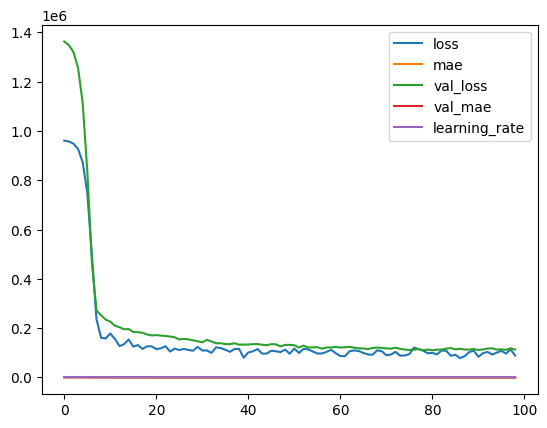

In [424]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [425]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[57494.2265625, 138.33033752441406]

Train data evaluation:
[47938.84765625, 128.00436401367188]


In [426]:
test_predictions = model.predict(X_test)

test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


,Test True Y,Model Predictions
0,552.00,655.594910
1,691.90,596.905151
2,1744.90,2021.585205
3,458.90,415.140381
4,279.90,340.057007
...,...,...
140,1299.90,1087.526611
141,1569.90,1695.308594
142,1359.99,1583.546387
143,632.20,496.385132


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

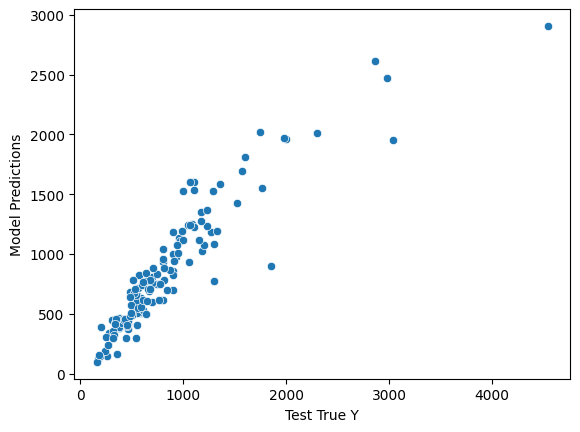

In [427]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [ ]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
138.33 $

MSE
57493.94 $^2

RMSE:
239.78 $

R-squared:
0.84

Explained variance score:
0.84


The results of the neural network for R² are 0.84 which is quite good since it is close to 1.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
evs_lin = explained_variance_score(y_test, y_pred_lin)

print("Linear Regression:")
print(f"MAE:  {mae_lin:.4f}")
print(f"MSE:  {mse_lin:.4f}")
print(f"RMSE: {rmse_lin:.4f}")
print(f"R²:   {r2_lin:.4f}")
print(f"Explained Variance: {evs_lin:.4f}")


Linear Regression:
MAE:  148.1633
MSE:  67564.9611
RMSE: 259.9326
R²:   0.8126
Explained Variance: 0.8128


Compared to the linear regression, the neural network achieves sligthly better results in every category. This means that the neural network is better suited to predict the price of a laptop, albeit only by a small margin. 

#### Price prediction

In [ ]:
# Dummy value generated with ChatGPT
# Dummy Laptop: all columns set to 0
new_laptop = pd.DataFrame([[0]*len(X.columns)], columns=X.columns)

new_laptop["Rating"] = 4.5
new_laptop["Low_Power_Cores"] = 4
new_laptop["Energy_Efficient_Units"] = 2
new_laptop["Threads"] = 16
new_laptop["RAM_GB"] = 32
new_laptop["Storage_capacity_GB"] = 1024
new_laptop["Graphics_integreted"] = 0
new_laptop["Display_size_inches"] = 15.6
new_laptop["Horizontal_pixel"] = 1920
new_laptop["Vertical_pixel"] = 1080
new_laptop["ppi"] = 141
new_laptop["Touch_screen"] = 0

# Brand (Dell z. B.)
new_laptop["Brand_Dell"] = 1

# Processor
new_laptop["Processor_brand_Intel"] = 1
new_laptop["Processor_name_Intel Core i7"] = 1

# RAM type
new_laptop["RAM_type_DDR5"] = 1

# Storage type
new_laptop["Storage_type_ SSD"] = 1

# GPU
new_laptop["GPU_simple_NVIDIA RTX"] = 1
new_laptop["Graphics_brand_NVIDIA"] = 1

# Operating system
new_laptop["Operating_system_Windows 11 OS"] = 1

print(new_laptop.head())


   Unnamed: 0  Rating  Low_Power_Cores  Energy_Efficient_Units  Threads  \
0           0     4.5                4                       2       16   

   RAM_GB  Storage_capacity_GB  Graphics_integreted  Display_size_inches  \
0      32                 1024                    0                 15.6   

   Horizontal_pixel  ...  GPU_simple_Other  Graphics_brand_AMD  \
0              1920  ...                 0                   0   

   Graphics_brand_Adreno  Graphics_brand_Intel  Graphics_brand_NVIDIA  \
0                      0                     0                      1   

   Operating_system_Chrome OS  Operating_system_DOS OS  \
0                           0                        0   

   Operating_system_Other  Operating_system_Windows 10 OS  \
0                       0                               0   

   Operating_system_Windows 11 OS  
0                               1  

[1 rows x 71 columns]


In [433]:
best_model = keras.models.load_model("best_model_regression.keras")

predicted_price = best_model.predict(new_laptop)
print(f"Predicted Price: {predicted_price[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted Price: 1482.34


The predicted price for the generated example laptop is €1 482.34